I've seen this [dataset](https://www.kaggle.com/c/titanic/data) and worked with it before in terms of predicting survival in Udacity's [Intro to Data Science](https://www.udacity.com/course/intro-to-data-science--ud359) course, so I'll investigate some altnernative avenues. Let's look at the people of the [Titanic](https://en.wikipedia.org/wiki/RMS_Titanic).

## Questions
* What is the distribution of the passenger classes by sex, age, and port of departure?
* What is the distribution of families by passenger class and port of embarkation?

This is the first occasion thinking about [Cherbourg](https://en.wikipedia.org/wiki/Cherbourg-Octeville), [Queenstown](https://en.wikipedia.org/wiki/Cobh), and [Southamption](https://en.wikipedia.org/wiki/Southampton) offering three different populations to the Titanic.

Let's get a first look at the data by importing it into a DataFrame.

In [151]:
import numpy as np
import pandas as pd

titanic_df = pd.read_csv('C:\\Users\\Nathan\\Dropbox\\study\\udacity\\DAND\\project2\\titanic_data.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


I'm going to use the *Pclass* (passenger class), *Sex*, *Age*, *SibSp* (number of siblings or spouse aboard), *Parch* (number of parents or children aboard), and *Embarked* (port of departure) columns so let's get those cleaned and into variables for easier visualization. I will [round](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.round.html) off the ages for ease of computation and [drop NaN values](http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.Series.dropna.html) in the age and embarked columns. 

The observant reader may notice that a checkbox for "part of a family that is on board" is not one of the columns. I am going to make an assumption that is probably not true in all cases by simply saying that anyone who has a family member on board is part of a family group. That means creating a new column. The multiple NaN values in *Cabin* column might give me headaches later, so I'll [drop](http://stackoverflow.com/questions/13411544/delete-column-from-pandas-dataframe) that entire column now.

In [159]:
passenger_class = titanic_df['Pclass']
passenger_sex = titanic_df['Sex']
passenger_age = titanic_df['Age'].dropna().round()
embarkation_port = titanic_df['Embarked'].dropna()
titanic_df['with_family'] = (titanic_df['SibSp'] + titanic_df['Parch']) > 1
family_member = titanic_df['with_family']

# dataframe for use in calling visualization functions
titantic_df_sans_cabin = titanic_df.drop('Cabin', axis=1)
titanic_df_dropped_na = titantic_df_sans_cabin.dropna()
titanic_df_dropped_na.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,with_family
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,False


The data seems reasonably clean for answering my questions so let's get to it.

## Question 1: What is the distribution of the passenger classes by sex, age, and port of departure?

For this I'll need seaborn documentation on [facetting histograms](http://stanford.edu/~mwaskom/software/seaborn/examples/faceted_histogram.html?highlight=linspace), the [FacetGrid](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.FacetGrid.html?highlight=facetgrid) function, and numpy's [linspace](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linspace.html) function. I got the idea to use seaborn from another [student's project](https://github.com/profversaggi/Udacity_Nano_DataScience/blob/master/Project_2/Project%20%23%202%20Submission%20-%20Investigate%20a%20Dataset%20-%20Titanic.ipynb) and its pretty plots.

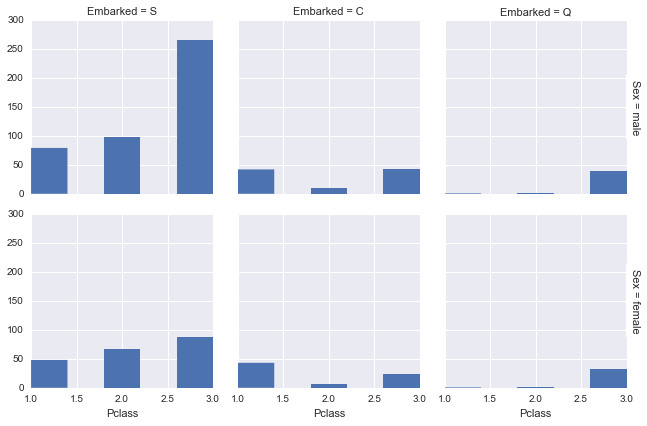

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

sns.set(style="darkgrid")

grid = sns.FacetGrid(titanic_df, row='Sex', col='Embarked', margin_titles=True)
bins = np.linspace(1, 3, 6)
grid.map(plt.hist, "Pclass", bins=bins, lw=0)

Southampton was by far the most popular port of departure. Almost all of the first class passengers boarded from either Southampton or Cherbourg. I suppose the wealthy of Queenstown, Ireland counted themselves lucky unless there just weren't many wealthy Irish patrons to be had.

How does the passenger class distribution look by age? We can use pandas built-in [histogram function](http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.DataFrame.hist.html). It's less pretty but the numerical labels should have obvious meaning.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000033A1E4A8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000034CA1CF8>], dtype=object)

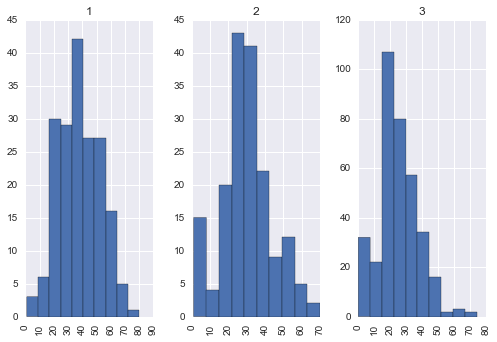

In [138]:
passenger_age.hist(bins=10, by=passenger_class, layout=(1, 3))

The passengers' ages skew toward young adults (that is, [positive](http://www.cvgs.k12.va.us/digstats/main/descriptv/d_skewd.html)) in all three passenger classes, but we have some older outliers. I'd be willing to bet that the former finding is due to most of the passengers being immigrants to the United States. 

In [163]:
# Display three boxplots where each shows a boxplot of age for each class of passenger.
sns.set(style="ticks")
sns.boxplot(x=passenger_class, y=passenger_age, hue=passenger_sex, data=titanic_df, palette="PRGn")
sns.despine(offset=10, trim=True)

ValueError: Grouper for '<class 'pandas.core.frame.DataFrame'>' not 1-dimensional

### Question 1 Summary
Most passengers departed from Southampton, England, most passengers were male, and many passengers were young adults.

## Question 2: What is the distribution of families by passenger class and port of embarkation?
